# Import Libraries

We can import instantaneously, or import all the common ones at the beginning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics.pairwise import haversine_distances
from math import radians, cos, sin, asin, sqrt

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
%matplotlib inline

### Data Dictionary

<table>
  <thead>
    <tr>
      <th>Parameters/Features</th>
      <th>Abbreviation</th>
      <th>Type</th>
      <th>Measurement</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>date</td>
      <td>Date</td>
      <td>year-month-day hour:minute:second</td>
      <td>-Time</td>
    </tr>
    <tr>
      <td>trip duration</td>
      <td>Duration</td>
      <td>Continuous</td>
      <td>1, 2, 3, … 5940</td>
    </tr>
    <tr>
      <td>trip distance</td>
      <td>Distance</td>
      <td>Continuous</td>
      <td>1, 2, 3, … 33,290</td>
    </tr>
    <tr>
      <td>pickup date and time</td>
      <td>PD time</td>
      <td>year-month-day hour:minute:second</td>
      <td>Time</td>
    </tr>
    <tr>
      <td>dropoff date and time</td>
      <td>DDtime</td>
      <td>year-month-day hour:minute:second</td>
      <td>Time</td>
    </tr>
    <tr>
      <td>pickup longitude</td>
      <td>PLong</td>
      <td>continuous</td>
      <td>Radians</td>
    </tr>
    <tr>
      <td>pickup latitude</td>
      <td>PLatd</td>
      <td>continuous</td>
      <td>Radians</td>
    </tr>
    <tr>
      <td>dropoff longitude</td>
      <td>DLong</td>
      <td>continuous</td>
      <td>Radians</td>
    </tr>
    <tr>
      <td>dropoff latitude</td>
      <td>DLatd</td>
      <td>continuous</td>
      <td>Radians</td>
    </tr>
    <tr>
      <td>haversine distance</td>
      <td>Haversine</td>
      <td>continuous</td>
      <td>Kilometres</td>
    </tr>
    <tr>
      <td>pickup month</td>
      <td>Pmonth</td>
      <td>categorical</td>
      <td>January, February, March, … December</td>
    </tr>
    <tr>
      <td>pickup day</td>
      <td>Pday</td>
      <td>categorical</td>
      <td>1,2,3, … 31</td>
    </tr>
    <tr>
      <td>pickup hour</td>
      <td>Phour</td>
      <td>categorical</td>
      <td>0,1,2, … 23</td>
    </tr>
    <tr>
      <td>pickup minute</td>
      <td>Pmin</td>
      <td>continuous</td>
      <td>1,2,3, … 60</td>
    </tr>
    <tr>
      <td>pickup day of the week</td>
      <td>PDweek</td>
      <td>categorical</td>
      <td>Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday</td>
    </tr>
    <tr>
      <td>dropoff month</td>
      <td>Dmonth</td>
      <td>categorical</td>
      <td>January, February, March,… December</td>
    </tr>
    <tr>
      <td>dropoff day</td>
      <td>Dday</td>
      <td>categorical</td>
      <td>1,2,3, … 31</td>
    </tr>
    <tr>
      <td>dropoff hour</td>
      <td>Dhour</td>
      <td>categorical</td>
      <td>0,1,2, … 23</td>
    </tr>
    <tr>
      <td>dropoff minute</td>
      <td>Dmin</td>
      <td>continuous</td>
      <td>1,2,3, … 60</td>
    </tr>
    <tr>
      <td>dropoff day of the week</td>
      <td>DDweek</td>
      <td>categorical</td>
      <td>Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday</td>
    </tr>
    <tr>
      <td>temperature</td>
      <td>Temp</td>
      <td>continuous</td>
      <td>°C</td>
    </tr>
    <tr>
      <td>precipitation</td>
      <td>Precip</td>
      <td>continuous</td>
      <td>Mm</td>
    </tr>
    <tr>
      <td>windspeed</td>
      <td>Wind</td>
      <td>continuous</td>
      <td>m/s</td>
    </tr>
    <tr>
      <td>humidity</td>
      <td>Humd</td>
      <td>continuous</td>
      <td>%</td>
    </tr>
    <tr>
      <td>solar radiation</td>
      <td>Solar</td>
      <td>continuous</td>
      <td>MJ/m<sup>2</sup></td>
    </tr>
    <tr>
      <td>snow fall</td>
      <td>Snow</td>
      <td>continuous</td>
      <td>cm</td>
    </tr>
    <tr>
      <td>ground temperature</td>
      <td>GroundTemp</td>
      <td>continuous</td>
      <td>°C</td>
    </tr>
    <tr>
      <td>1 hour average fine dust concentration</td>
      <td>Dust</td>
      <td>continuous</td>
      <td>㎍/㎥</td>
    </tr>
  </tbody>
</table>


**Duration** is out Target Variable, and henxe this becomes a Regression Problem

# Import Data

In [ ]:
import os
dir_path = os.getcwd() 
static_dir_path = os.path.join(dir_path, "Static")
report_path = os.path.join(static_dir_path, "For_modeling.csv")
seoul_data = pd.read_csv(report_path, index_col=[0])
seoul_data.head(15)

Duration  Distance      PLong       PLatd      DLong       DLatd  \
0          0        50  37.544666  126.888359  37.544666  126.888359   
1         24      7670  37.506199  127.003944  37.551250  127.035103   
2          8      1390  37.544590  127.057083  37.537014  127.061096   
3          8      1820  37.571102  127.023560  37.561447  127.034920   
4          4       850  37.573242  127.015907  37.565849  127.016403   
5          8      1800  37.571102  127.023560  37.561447  127.034920   
6         25      4770  37.593288  127.036667  37.582500  126.998535   
7          4       630  37.552914  126.836571  37.557968  126.838287   
8          3       950  37.459953  127.024742  37.455799  127.016289   
9         25      3900  37.527122  127.028717  37.539654  127.052589   
10        27      4750  37.570721  126.898979  37.578072  126.930817   
11        23      4820  37.570721  126.898979  37.578072  126.930817   
12        16      2930  37.599491  126.916862  37.620949  126.925636   
13        30      5140  37.512169  127.078934  37.483311  127.084938   
14        11      1800  37.525650  126.887817  37.535961  126.898300   

    Haversine  Pmonth  Pday  Phour  ...  Dmin  DDweek  Temp  Precip  Wind  \
0    0.000000       1     1      0  ...     4       0  -3.2     0.0   0.5   
1    5.713529       1     1      0  ...    25       0  -3.2     0.0   0.5   
2    0.913702       1     1      0  ...     9       0  -3.2     0.0   0.5   
3    1.468027       1     1      0  ...    10       0  -3.2     0.0   0.5   
4    0.823227       1     1      0  ...     6       0  -3.2     0.0   0.5   
5    1.468027       1     1      0  ...    10       0  -3.2     0.0   0.5   
6    3.567644       1     1      0  ...    27       0  -3.2     0.0   0.5   
7    0.581982       1     1      0  ...     6       0  -3.2     0.0   0.5   
8    0.877524       1     1      0  ...     5       0  -3.2     0.0   0.5   
9    2.524430       1     1      0  ...    28       0  -3.2     0.0   0.5   
10   2.922488       1     1      0  ...    30       0  -3.2     0.0   0.5   
11   2.922488       1     1      0  ...    30       0  -3.2     0.0   0.5   
12   2.508075       1     1      0  ...    20       0  -3.2     0.0   0.5   
13   3.252289       1     1      0  ...    36       0  -3.2     0.0   0.5   
14   1.472768       1     1      0  ...    17       0  -3.2     0.0   0.5   

    Humid  Solar  Snow  GroundTemp  Dust  
0      40    0.0   0.0        -2.2    25  
1      40    0.0   0.0        -2.2    25  
2      40    0.0   0.0        -2.2    25  
3      40    0.0   0.0        -2.2    25  
4      40    0.0   0.0        -2.2    25  
5      40    0.0   0.0        -2.2    25  
6      40    0.0   0.0        -2.2    25  
7      40    0.0   0.0        -2.2    25  
8      40    0.0   0.0        -2.2    25  
9      40    0.0   0.0        -2.2    25  
10     40    0.0   0.0        -2.2    25  
11     40    0.0   0.0        -2.2    25  
12     40    0.0   0.0        -2.2    25  
13     40    0.0   0.0        -2.2    25  
14     40    0.0   0.0        -2.2    25  

[15 rows x 25 columns]

# EDA

analysing the state of each attribute, the statistics of the complete population

In [ ]:
seoul_data.shape

(1048575, 25)

We have around 9M datapoints, 25 attributes

In [ ]:
seoul_data.isna().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

No tuple has ***null*** values

In [ ]:
#descriptive statistics
seoul_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

Duration     Distance        PLong        PLatd        DLong  \
count  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06   
mean       24.3209       3515.9      37.5485      126.987      37.5483   
std        24.0493      3680.28    0.0412668    0.0765985    0.0411957   
min              0           10      37.4433      126.799      37.4433   
25%              7         1210      37.5203      126.923      37.5203   
50%             15         2210      37.5499      126.984      37.5495   
75%             34         4360      37.5733      127.054      37.5733   
max            119        33290      37.6897      127.178      37.6897   

             DLatd    Haversine       Pmonth         Pday        Phour  ...  \
count  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  ...   
mean       126.987      1.84171      2.82267       14.422      13.9989  ...   
std      0.0770184      1.91726     0.999012      8.74741      5.82568  ...   
min        126.799            0            1            1            0  ...   
25%        126.921     0.694159            2            7           10  ...   
50%        126.983      1.25495            3           13           15  ...   
75%        127.054      2.34253            4           22           18  ...   
max        127.178       25.362            4           31           23  ...   

              Dmin       DDweek         Temp       Precip         Wind  \
count  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06   
mean       30.0955      2.82996      7.97608   0.00620061      2.22605   
std        17.3242      1.97503      8.13446     0.151103      1.14759   
min              0            0        -17.8            0            0   
25%             15            1          2.6            0          1.3   
50%             30            3          8.4            0          2.1   
75%             45            4         14.8            0            3   
max             59            6         23.7           17          7.4   

             Humid        Solar         Snow   GroundTemp         Dust  
count  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  1.04858e+06  
mean       48.5384     0.731307    0.0344726      8.60863      44.7198  
std        19.2989     0.904138     0.252103      8.82369      30.7921  
min             14            0            0        -13.6            0  
25%             33            0            0          0.7           23  
50%             47         0.32            0          8.4           40  
75%             62         1.19            0         15.4           62  
max             98         3.32          4.1         28.5          304  

[8 rows x 25 columns]

In [ ]:
seoul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1070727
Data columns (total 25 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Duration    1048575 non-null  int64  
 1   Distance    1048575 non-null  int64  
 2   PLong       1048575 non-null  float64
 3   PLatd       1048575 non-null  float64
 4   DLong       1048575 non-null  float64
 5   DLatd       1048575 non-null  float64
 6   Haversine   1048575 non-null  float64
 7   Pmonth      1048575 non-null  int64  
 8   Pday        1048575 non-null  int64  
 9   Phour       1048575 non-null  int64  
 10  Pmin        1048575 non-null  int64  
 11  PDweek      1048575 non-null  int64  
 12  Dmonth      1048575 non-null  int64  
 13  Dday        1048575 non-null  int64  
 14  Dhour       1048575 non-null  int64  
 15  Dmin        1048575 non-null  int64  
 16  DDweek      1048575 non-null  int64  
 17  Temp        1048575 non-null  float64
 18  Precip      1048575 no

In [ ]:
seoul_data.nunique()

Duration        119
Distance       3263
PLong          1196
PLatd          1197
DLong          1202
DLatd          1204
Haversine     78548
Pmonth            4
Pday             31
Phour            24
Pmin             60
PDweek            7
Dmonth            4
Dday             31
Dhour            24
Dmin             60
DDweek            7
Temp            379
Precip           23
Wind             63
Humid            85
Solar           285
Snow             31
GroundTemp      391
Dust            139
dtype: int64

## Univariate Analysis

Looking the distribution of each attribute:

* Histogram for distribution
* Box-plot for quartile range and outlier analysis
* value_count for checking the span and diversity of values

Tips:   
[Understanding Box-plot & Histogram](https://towardsdatascience.com/understanding-the-data-using-histogram-and-boxplot-with-example-425a52b5b8a6)    
[Power of box-plot](https://www.dummies.com/education/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set/)

In [ ]:
seoul_data.Duration.value_counts()

5      51717
4      50702
6      50195
7      46827
8      44142
       ...  
116      843
117      836
118      763
119      596
0          1
Name: Duration, Length: 119, dtype: int64

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

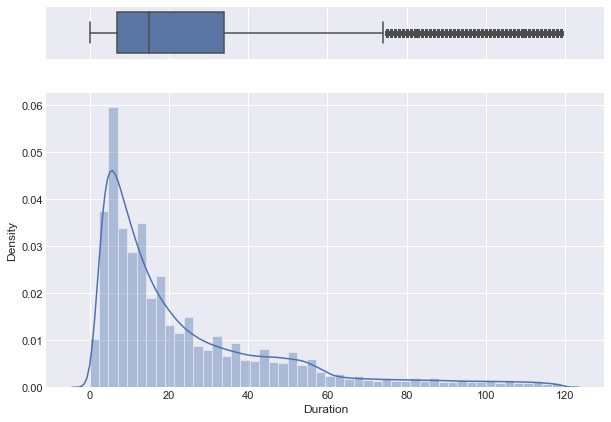

In [ ]:
# Cut the window in 2 parts
plt.style.use('seaborn-darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,7))

# Add a graph in each part
sns.boxplot(seoul_data["Duration"], ax=ax_box)
sns.distplot(seoul_data["Duration"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


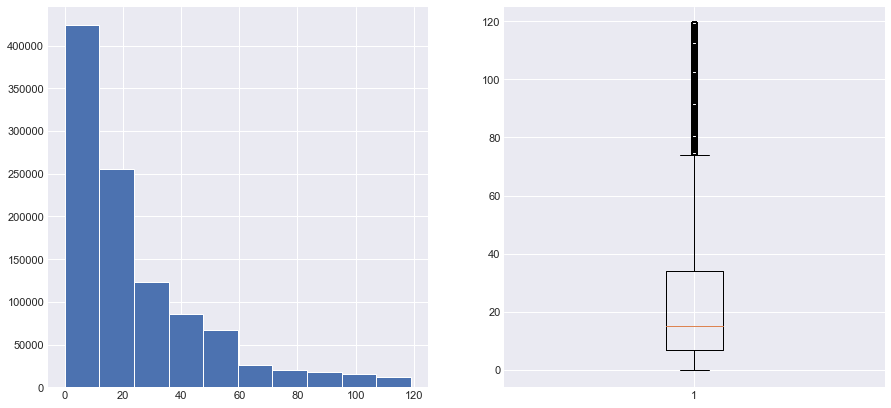

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Duration"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Haversine.value_counts()

0.000000    101442
0.936970      2039
0.714991      1445
0.452993      1404
0.621549      1381
             ...  
7.036461         1
6.538651         1
9.848458         1
4.981271         1
2.485547         1
Name: Haversine, Length: 78548, dtype: int64

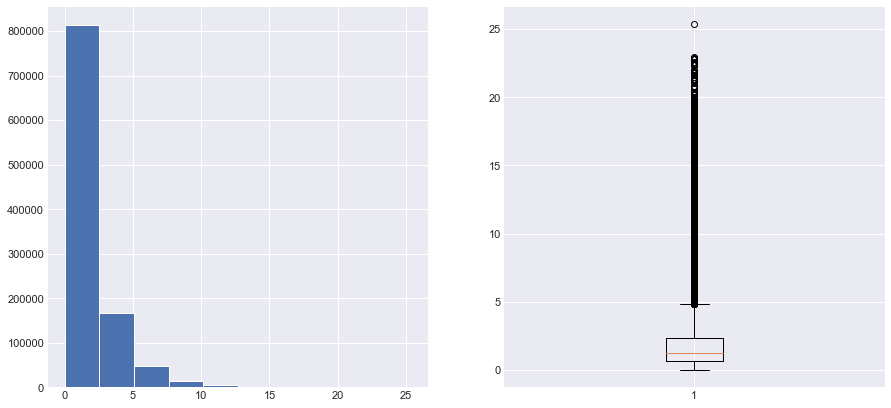

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Haversine"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Distance.value_counts()

910      4339
900      4221
950      4205
890      4190
1100     4174
         ... 
32110       1
25910       1
27610       1
33120       1
25080       1
Name: Distance, Length: 3263, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x27b2b818220>,
 'caps': [<matplotlib.lines.Line2D at 0x27b2b818940>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b2b807e20>],
 'medians': [<matplotlib.lines.Line2D at 0x27b2b8250a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b2b825430>],
 'means': []}

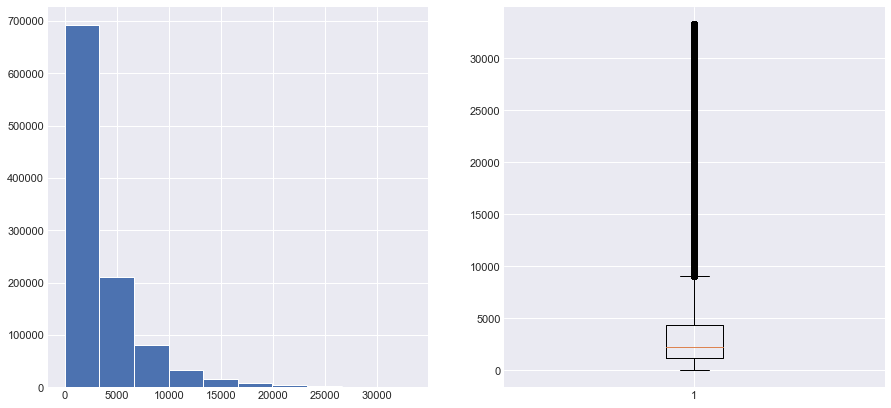

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Distance"]
ax1.hist(x)
ax2.boxplot(x)


In [ ]:
seoul_data.Temp.value_counts()

 17.9    13113
 10.3    12163
 16.0    11736
 9.6     10736
 17.5     9794
         ...  
-10.7       57
-15.4       49
-11.9       44
-16.9       34
 11.3       29
Name: Temp, Length: 379, dtype: int64

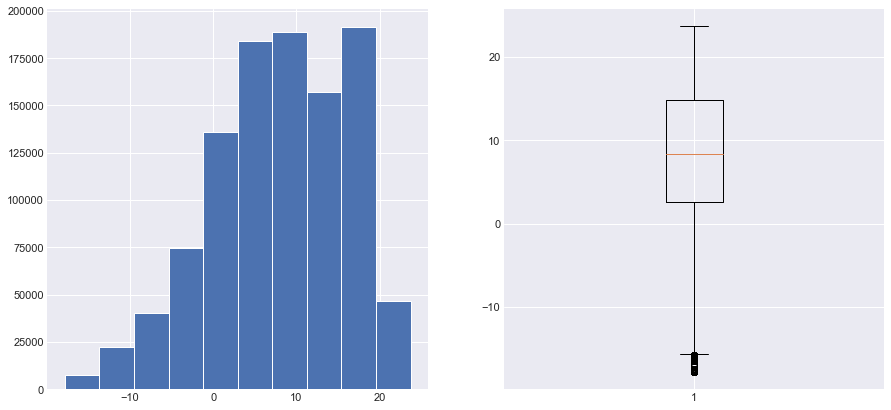

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Temp"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Precip.value_counts()

0.0     1042536
0.5        1778
0.1         938
0.2         922
2.0         716
1.5         363
3.0         255
1.0         240
3.3         181
0.9         146
0.4         124
1.4          99
0.3          52
0.8          42
3.7          34
9.0          32
17.0         31
7.0          23
1.9          23
3.5          15
8.0           9
9.5           9
4.5           7
Name: Precip, dtype: int64

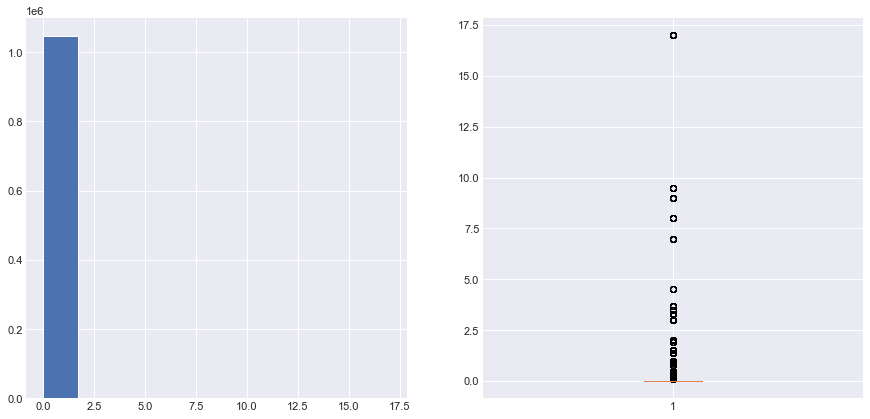

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Precip"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Wind.value_counts()

2.0    44510
2.1    38369
1.3    37521
1.1    34880
2.2    34811
       ...  
6.1      351
0.0      177
6.7      146
7.3      138
5.4       72
Name: Wind, Length: 63, dtype: int64

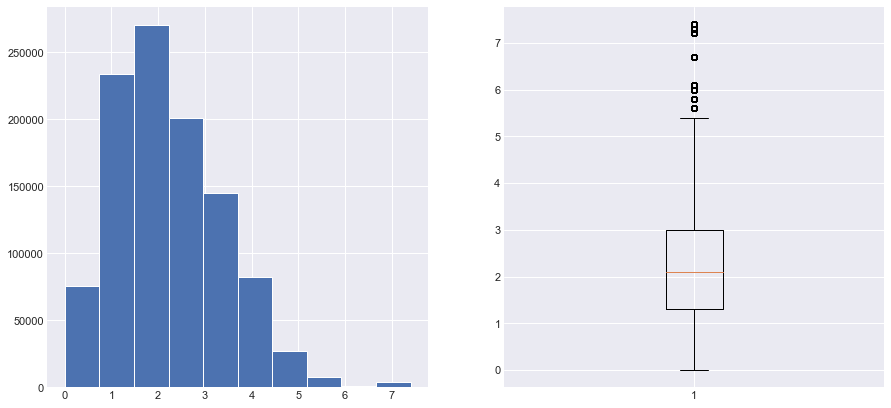

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Wind"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.GroundTemp.value_counts()

 0.0     33910
-0.1     16798
-0.2     14954
 10.3     9305
 0.1      9278
         ...  
-13.2       62
-12.8       58
-12.1       53
-11.9       44
-13.0       34
Name: GroundTemp, Length: 391, dtype: int64

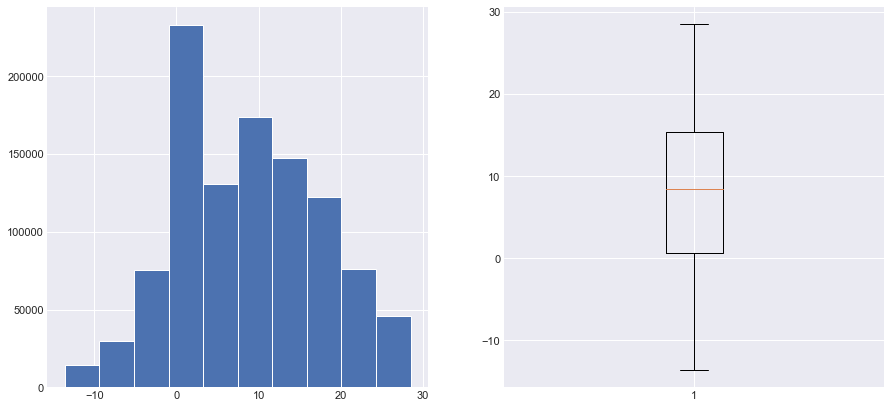

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["GroundTemp"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Solar.value_counts()

0.00    343031
0.01     18135
0.02     14078
0.06     13599
0.11      8700
         ...  
2.04       192
1.89       191
1.36       185
2.01       159
1.27       141
Name: Solar, Length: 285, dtype: int64

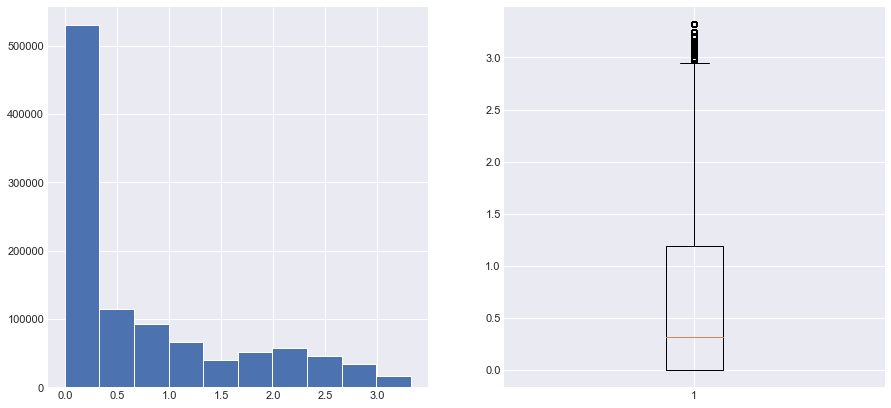

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Solar"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Snow.value_counts()

0.0    1015624
1.0       4779
0.5       4275
0.7       3408
0.3       3385
0.9       3278
1.6       3199
0.6       2130
0.2       1239
0.4       1186
3.5       1020
3.7        831
0.8        735
1.8        503
3.4        372
3.0        361
1.7        295
3.8        277
1.3        248
2.2        220
1.4        199
1.5        169
2.8        165
2.5        151
4.1        101
3.2        101
2.0         99
3.3         73
0.1         61
4.0         55
3.9         36
Name: Snow, dtype: int64

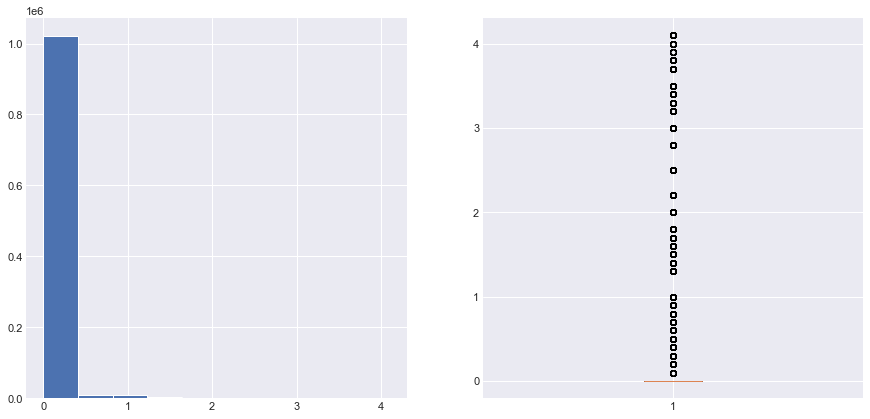

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Snow"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Humid.value_counts()

43    26720
33    25389
38    24543
47    24311
34    24022
      ...  
95     1485
89      572
91      470
92      248
93      161
Name: Humid, Length: 85, dtype: int64

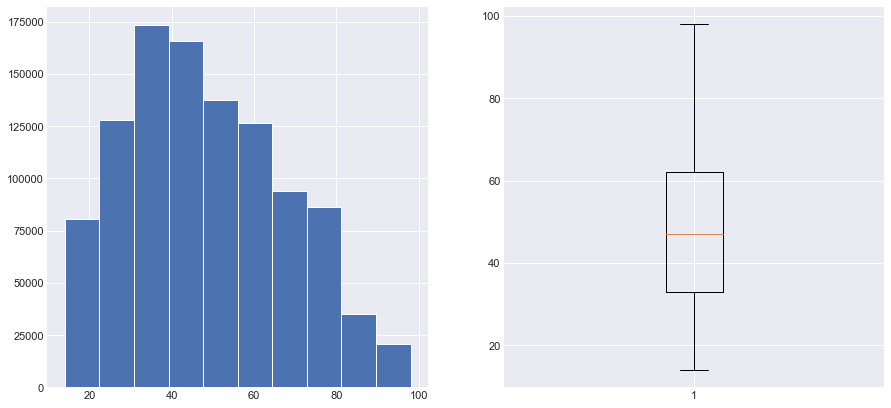

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Humid"]
ax1.hist(x)
ax2.boxplot(x);

In [ ]:
seoul_data.Dust.value_counts()

28     27731
0      26398
17     26094
40     21779
32     20510
       ...  
148      237
169      234
107      224
113      167
106      146
Name: Dust, Length: 139, dtype: int64

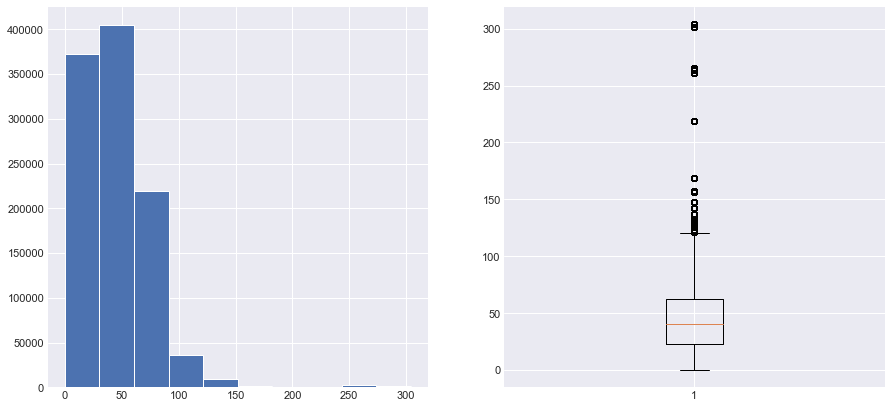

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul_data["Dust"]
ax1.hist(x)
ax2.boxplot(x);

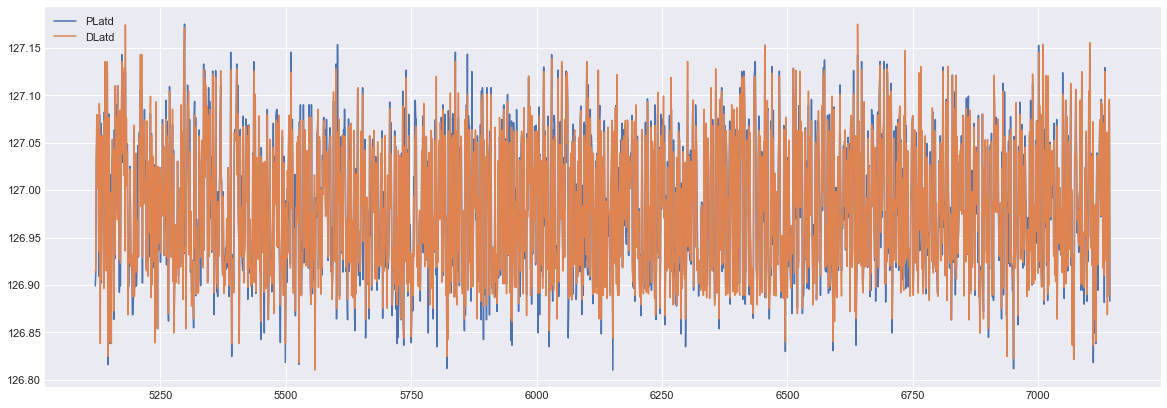

In [ ]:
plt.figure(figsize = (20,7))
plt.rc('font', size=14)
plt.plot(seoul_data['PLatd'][5000:7000], label = "PLatd")
plt.plot(seoul_data['DLatd'][5000:7000], label = "DLatd")
plt.legend()
plt.show()

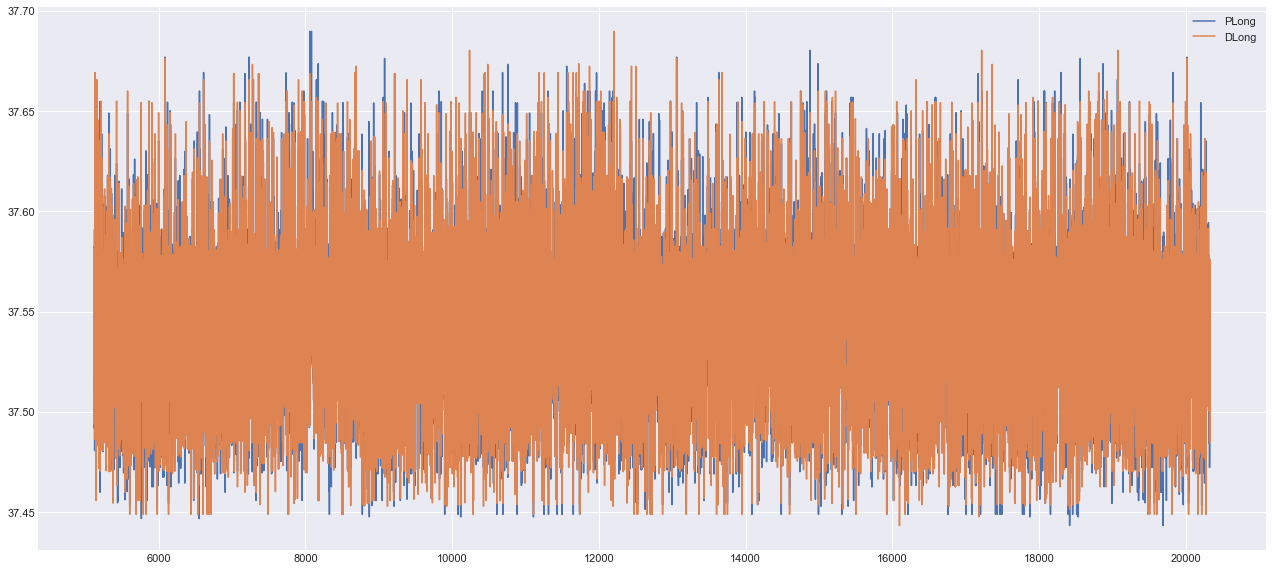

In [ ]:
plt.figure(figsize = (22,10))
plt.rc('font', size=14)
plt.plot(seoul_data['PLong'][5000:20000], label = "PLong")
plt.plot(seoul_data['DLong'][5000:20000], label = "DLong")
plt.legend()
plt.show()

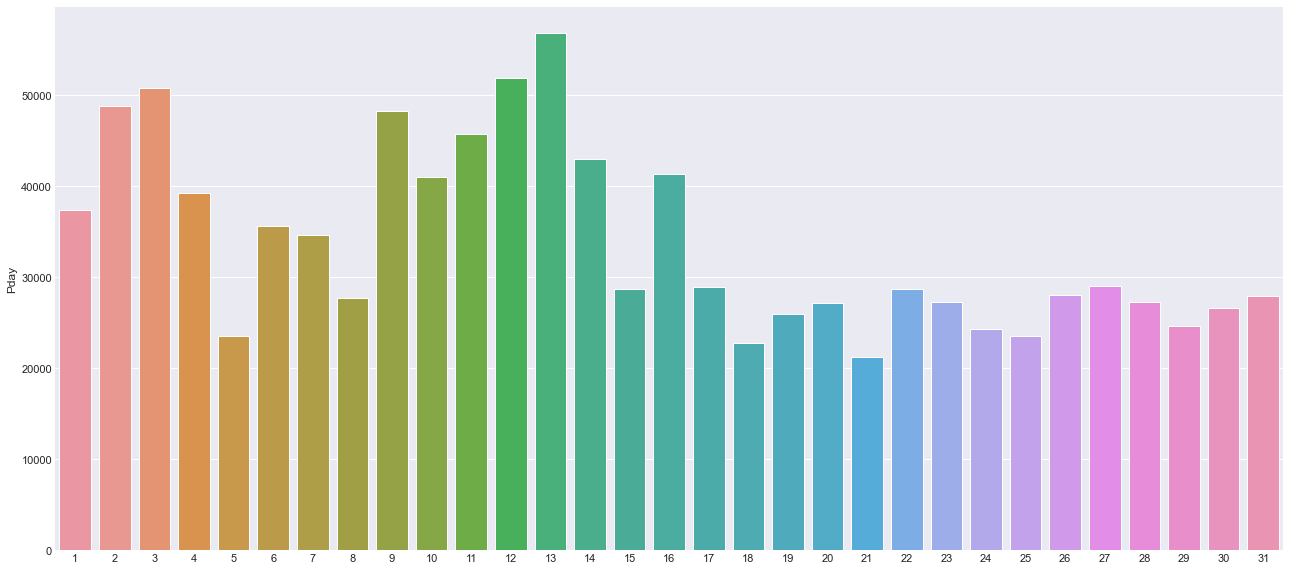

In [ ]:
plt.figure(figsize = (22,10))
plt.rc('font', size=14)
sns.barplot( y=seoul_data.Pday.value_counts(), x=seoul_data.Pday.value_counts().index)
plt.show()

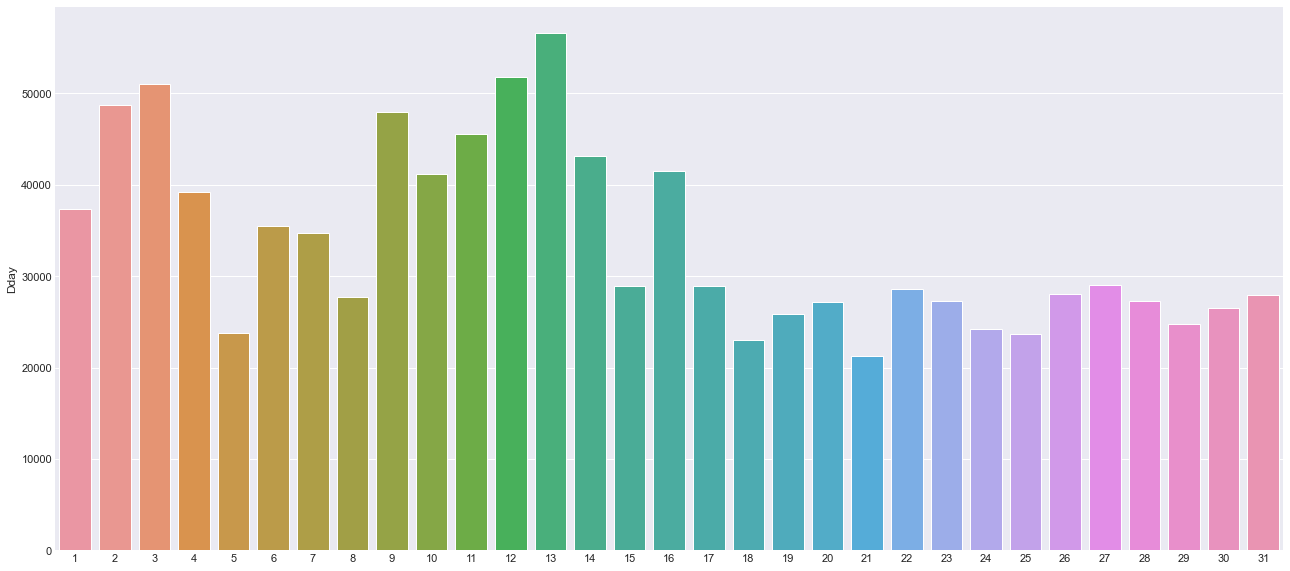

In [ ]:
plt.figure(figsize = (22,10))
plt.rc('font', size=14)
sns.barplot( y=seoul_data.Dday.value_counts(), x=seoul_data.Dday.value_counts().index)
plt.show()

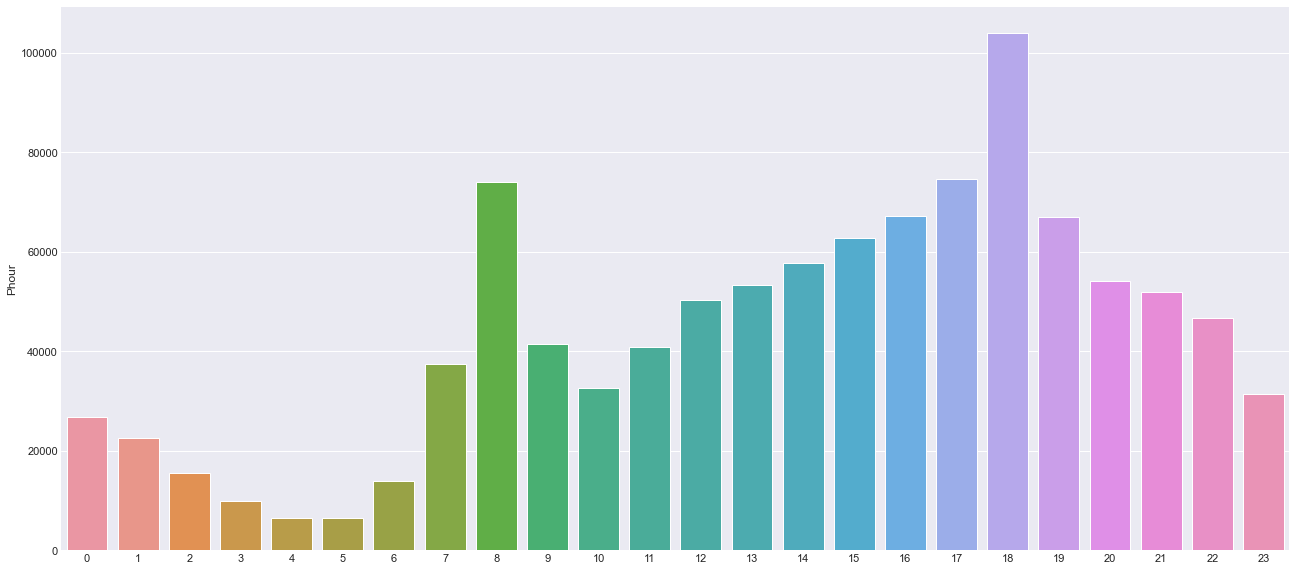

In [ ]:
plt.figure(figsize = (22,10))
plt.rc('font', size=14)
sns.barplot( y=seoul_data.Phour.value_counts(), x=seoul_data.Phour.value_counts().index)
plt.show()

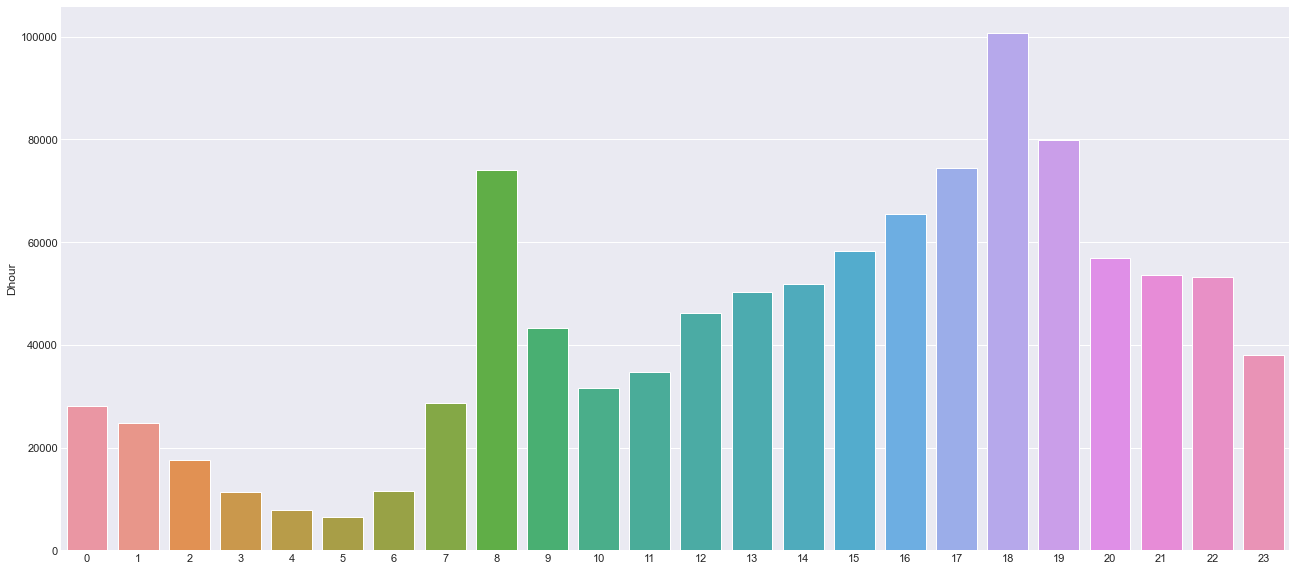

In [ ]:
plt.figure(figsize = (22,10))
plt.rc('font', size=14)
sns.barplot( y=seoul_data.Dhour.value_counts(), x=seoul_data.Dhour.value_counts().index)
plt.show()

#### We see that even with the absence of null values, a lot of columns has "0" values

In [ ]:
(seoul_data == 0.00).sum()

Duration            1
Distance            0
PLong               0
PLatd               0
DLong               0
DLatd               0
Haversine      101442
Pmonth              0
Pday                0
Phour           26808
Pmin            16399
PDweek         166663
Dmonth              0
Dday                0
Dhour           28129
Dmin            17059
DDweek         166238
Temp             2153
Precip        1042536
Wind              177
Humid               0
Solar          343031
Snow          1015624
GroundTemp      33910
Dust            26398
dtype: int64

Also, the **Latitude and Longitude columns** are titles **incorrectly**, as Latitude cannot be greater than 90°

In [ ]:
print(seoul_data["PLatd"][1])
print(seoul_data["PLong"][1])
print(seoul_data["DLatd"][1])
print(seoul_data["DLong"][1])

127.003944
37.506199
127.035103
37.55125


In [ ]:
seoul_data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

Interchanging the column names

In [ ]:
seoul_data[['PLatd','PLong']] = seoul_data[['PLong','PLatd']]
seoul_data[['DLatd','DLong']] = seoul_data[['DLong','DLatd']]
seoul_data

Duration  Distance       PLong      PLatd       DLong      DLatd  \
0               0        50  126.888359  37.544666  126.888359  37.544666   
1              24      7670  127.003944  37.506199  127.035103  37.551250   
2               8      1390  127.057083  37.544590  127.061096  37.537014   
3               8      1820  127.023560  37.571102  127.034920  37.561447   
4               4       850  127.015907  37.573242  127.016403  37.565849   
...           ...       ...         ...        ...         ...        ...   
1070723        45      3350  126.892799  37.481602  126.901039  37.482883   
1070724        15      1410  126.978355  37.572582  126.978355  37.572582   
1070725        22      1910  126.887817  37.525650  126.875580  37.524063   
1070726        52      8690  126.940735  37.560009  126.910233  37.504566   
1070727        28      3600  127.088493  37.625435  127.110733  37.616711   

         Haversine  Pmonth  Pday  Phour  ...  Dmin  DDweek  Temp  Precip  \
0         0.000000       1     1      0  ...     4       0  -3.2     0.0   
1         5.713529       1     1      0  ...    25       0  -3.2     0.0   
2         0.913702       1     1      0  ...     9       0  -3.2     0.0   
3         1.468027       1     1      0  ...    10       0  -3.2     0.0   
4         0.823227       1     1      0  ...     6       0  -3.2     0.0   
...            ...     ...   ...    ...  ...   ...     ...   ...     ...   
1070723   0.740902       4    16     16  ...    37       0  18.5     0.0   
1070724   0.000000       4    16     16  ...     6       0  18.5     0.0   
1070725   1.093485       4    16     16  ...    14       0  18.5     0.0   
1070726   6.726158       4    16     16  ...    44       0  18.5     0.0   
1070727   2.185811       4    16     16  ...    20       0  18.5     0.0   

         Wind  Humid  Solar  Snow  GroundTemp  Dust  
0         0.5     40   0.00   0.0        -2.2    25  
1         0.5     40   0.00   0.0        -2.2    25  
2         0.5     40   0.00   0.0        -2.2    25  
3         0.5     40   0.00   0.0        -2.2    25  
4         0.5     40   0.00   0.0        -2.2    25  
...       ...    ...    ...   ...         ...   ...  
1070723   3.0     24   2.27   0.0        23.4    38  
1070724   3.0     24   2.27   0.0        23.4    38  
1070725   3.0     24   2.27   0.0        23.4    38  
1070726   3.0     24   2.27   0.0        23.4    38  
1070727   3.0     24   2.27   0.0        23.4    38  

[1048575 rows x 25 columns]

Trying to fill Haversine distance using function

In [ ]:
def calc_haversine(lon1, lat1, lon2, lat2, is_deg=True):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    if is_deg:
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = (sin(dlat/2)**2) + ((cos(lat1) * cos(lat2)) * sin(dlon/2)**2)
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

d = seoul_data["Haversine"][1]
plat = seoul_data["PLatd"][1]
plon = seoul_data["PLong"][1]
dlat = seoul_data["DLatd"][1]
dlon = seoul_data["DLong"][1]

print(d)
calc_haversine(plon, plat, dlon, dlat)


5.713529


5.713521107899132

# Preprocessing

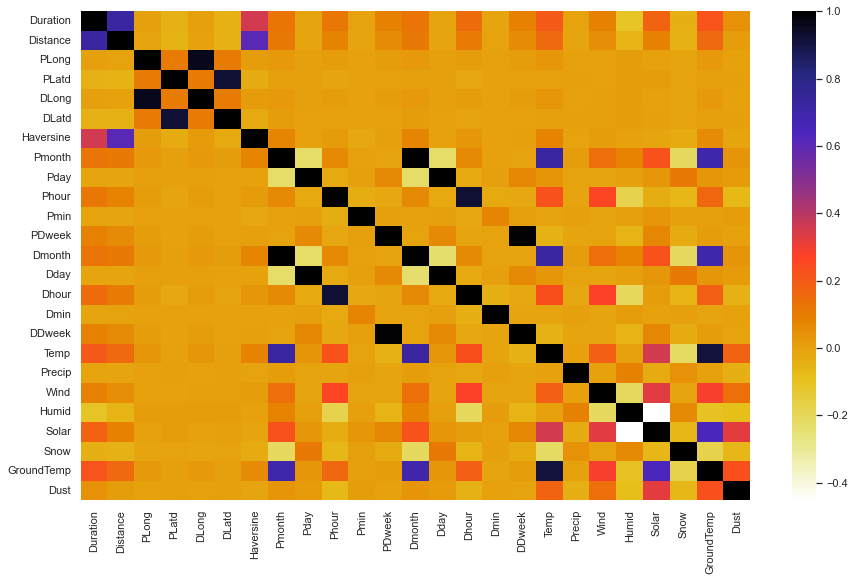

In [ ]:
#correlation

sns.set()
plt.figure(figsize=(15,9))
sns.heatmap(seoul_data.corr(), annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
seoul_data.reset_index(drop=True, inplace=True)
seoul_data.tail(8)

Duration  Distance       PLong      PLatd       DLong      DLatd  \
1048567        17      3240  127.100960  37.513126  127.127647  37.502594   
1048568        15      2410  127.092972  37.536579  127.077873  37.528587   
1048569        25      4110  127.057831  37.577793  127.078644  37.556030   
1048570        45      3350  126.892799  37.481602  126.901039  37.482883   
1048571        15      1410  126.978355  37.572582  126.978355  37.572582   
1048572        22      1910  126.887817  37.525650  126.875580  37.524063   
1048573        52      8690  126.940735  37.560009  126.910233  37.504566   
1048574        28      3600  127.088493  37.625435  127.110733  37.616711   

         Haversine  Pmonth  Pday  Phour  ...  Dmin  DDweek  Temp  Precip  \
1048567   2.629221       4    16     16  ...     8       0  18.5     0.0   
1048568   1.600744       4    16     16  ...     6       0  18.5     0.0   
1048569   3.036639       4    16     16  ...    16       0  18.5     0.0   
1048570   0.740902       4    16     16  ...    37       0  18.5     0.0   
1048571   0.000000       4    16     16  ...     6       0  18.5     0.0   
1048572   1.093485       4    16     16  ...    14       0  18.5     0.0   
1048573   6.726158       4    16     16  ...    44       0  18.5     0.0   
1048574   2.185811       4    16     16  ...    20       0  18.5     0.0   

         Wind  Humid  Solar  Snow  GroundTemp  Dust  
1048567   3.0     24   2.27   0.0        23.4    38  
1048568   3.0     24   2.27   0.0        23.4    38  
1048569   3.0     24   2.27   0.0        23.4    38  
1048570   3.0     24   2.27   0.0        23.4    38  
1048571   3.0     24   2.27   0.0        23.4    38  
1048572   3.0     24   2.27   0.0        23.4    38  
1048573   3.0     24   2.27   0.0        23.4    38  
1048574   3.0     24   2.27   0.0        23.4    38  

[8 rows x 25 columns]

In [ ]:
ids = list(np.where(seoul_data["Haversine"] == 0.00)[0])
len(ids)

101442

In [ ]:
for s in ids[:10]:
    print(calc_haversine(seoul_data["PLong"][s], seoul_data["PLatd"][s], seoul_data["DLong"][s], seoul_data["DLatd"][s]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Dropping the rows where **Haversine** is **0.00** along with other columns selected analytically

In [ ]:
seoul_data.drop(labels=["Snow", "Precip", "PLatd", "PLong", "DLatd", "DLong"], axis=1, inplace=True)
seoul_data = seoul_data.loc[seoul_data["Dust"] * seoul_data["Wind"] * seoul_data["Haversine"] * seoul_data["Solar"]!= 0.0]
seoul_data.reset_index(drop=True, inplace=True)

In [ ]:
seoul_data

Duration  Distance  Haversine  Pmonth  Pday  Phour  Pmin  PDweek  \
0             72     13620   3.951107       1     1      9     0       0   
1              4      1130   0.864268       1     1      9     0       0   
2             30      6850   3.787676       1     1      9     1       0   
3              4      1080   0.705526       1     1      9     1       0   
4              3       630   0.540025       1     1      9     1       0   
...          ...       ...        ...     ...   ...    ...   ...     ...   
612920        25      4110   3.036639       4    16     16    51       0   
612921        45      3350   0.740902       4    16     16    51       0   
612922        22      1910   1.093485       4    16     16    51       0   
612923        52      8690   6.726158       4    16     16    51       0   
612924        28      3600   2.185811       4    16     16    51       0   

        Dmonth  Dday  Dhour  Dmin  DDweek  Temp  Wind  Humid  Solar  \
0            1     1     10    12       0  -4.3   0.7     39   0.15   
1            1     1      9     5       0  -4.3   0.7     39   0.15   
2            1     1      9    31       0  -4.3   0.7     39   0.15   
3            1     1      9     6       0  -4.3   0.7     39   0.15   
4            1     1      9     5       0  -4.3   0.7     39   0.15   
...        ...   ...    ...   ...     ...   ...   ...    ...    ...   
612920       4    16     17    16       0  18.5   3.0     24   2.27   
612921       4    16     17    37       0  18.5   3.0     24   2.27   
612922       4    16     17    14       0  18.5   3.0     24   2.27   
612923       4    16     17    44       0  18.5   3.0     24   2.27   
612924       4    16     17    20       0  18.5   3.0     24   2.27   

        GroundTemp  Dust  
0             -3.6    28  
1             -3.6    28  
2             -3.6    28  
3             -3.6    28  
4             -3.6    28  
...            ...   ...  
612920        23.4    38  
612921        23.4    38  
612922        23.4    38  
612923        23.4    38  
612924        23.4    38  

[612925 rows x 19 columns]

Dropping Day, Month and Week variables of **drop** context, as the   
entire circulation is within the same city, and these columns become **repetitive**

In [ ]:
seoul_data.drop(labels=["Dday", "Dmonth", "DDweek"], axis=1, inplace=True)
seoul_data

C:\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Duration  Distance  Haversine  Pmonth  Pday  Phour  Pmin  PDweek  \
0             72     13620   3.951107       1     1      9     0       0   
1              4      1130   0.864268       1     1      9     0       0   
2             30      6850   3.787676       1     1      9     1       0   
3              4      1080   0.705526       1     1      9     1       0   
4              3       630   0.540025       1     1      9     1       0   
...          ...       ...        ...     ...   ...    ...   ...     ...   
612920        25      4110   3.036639       4    16     16    51       0   
612921        45      3350   0.740902       4    16     16    51       0   
612922        22      1910   1.093485       4    16     16    51       0   
612923        52      8690   6.726158       4    16     16    51       0   
612924        28      3600   2.185811       4    16     16    51       0   

        Dhour  Dmin  Temp  Wind  Humid  Solar  GroundTemp  Dust  
0          10    12  -4.3   0.7     39   0.15        -3.6    28  
1           9     5  -4.3   0.7     39   0.15        -3.6    28  
2           9    31  -4.3   0.7     39   0.15        -3.6    28  
3           9     6  -4.3   0.7     39   0.15        -3.6    28  
4           9     5  -4.3   0.7     39   0.15        -3.6    28  
...       ...   ...   ...   ...    ...    ...         ...   ...  
612920     17    16  18.5   3.0     24   2.27        23.4    38  
612921     17    37  18.5   3.0     24   2.27        23.4    38  
612922     17    14  18.5   3.0     24   2.27        23.4    38  
612923     17    44  18.5   3.0     24   2.27        23.4    38  
612924     17    20  18.5   3.0     24   2.27        23.4    38  

[612925 rows x 16 columns]

## Multivariate Analysis

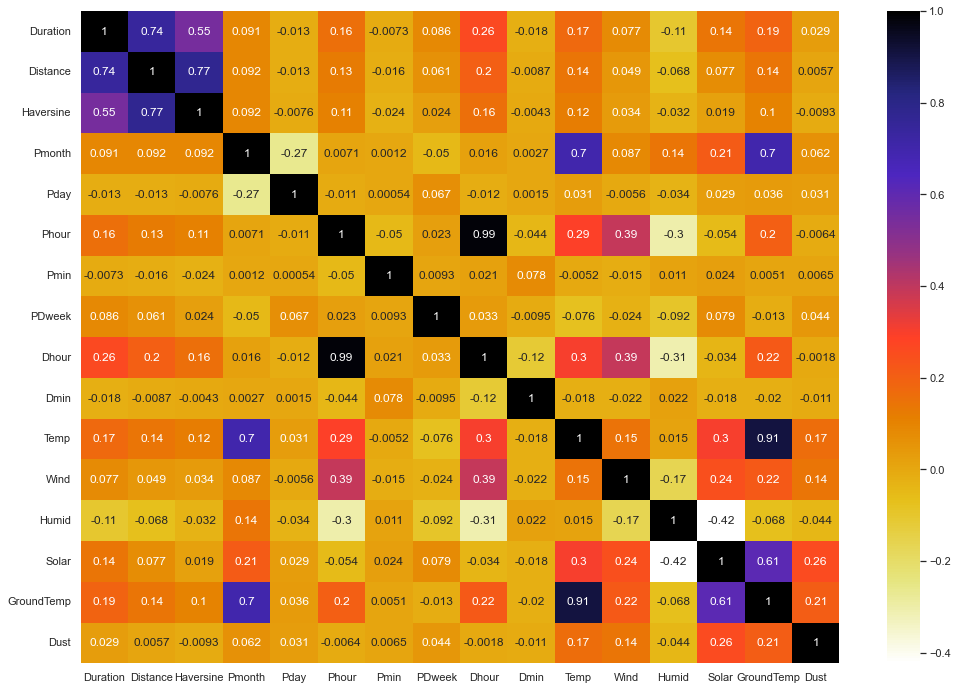

In [ ]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(seoul_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
sampling = seoul_data.sample(n=10000)

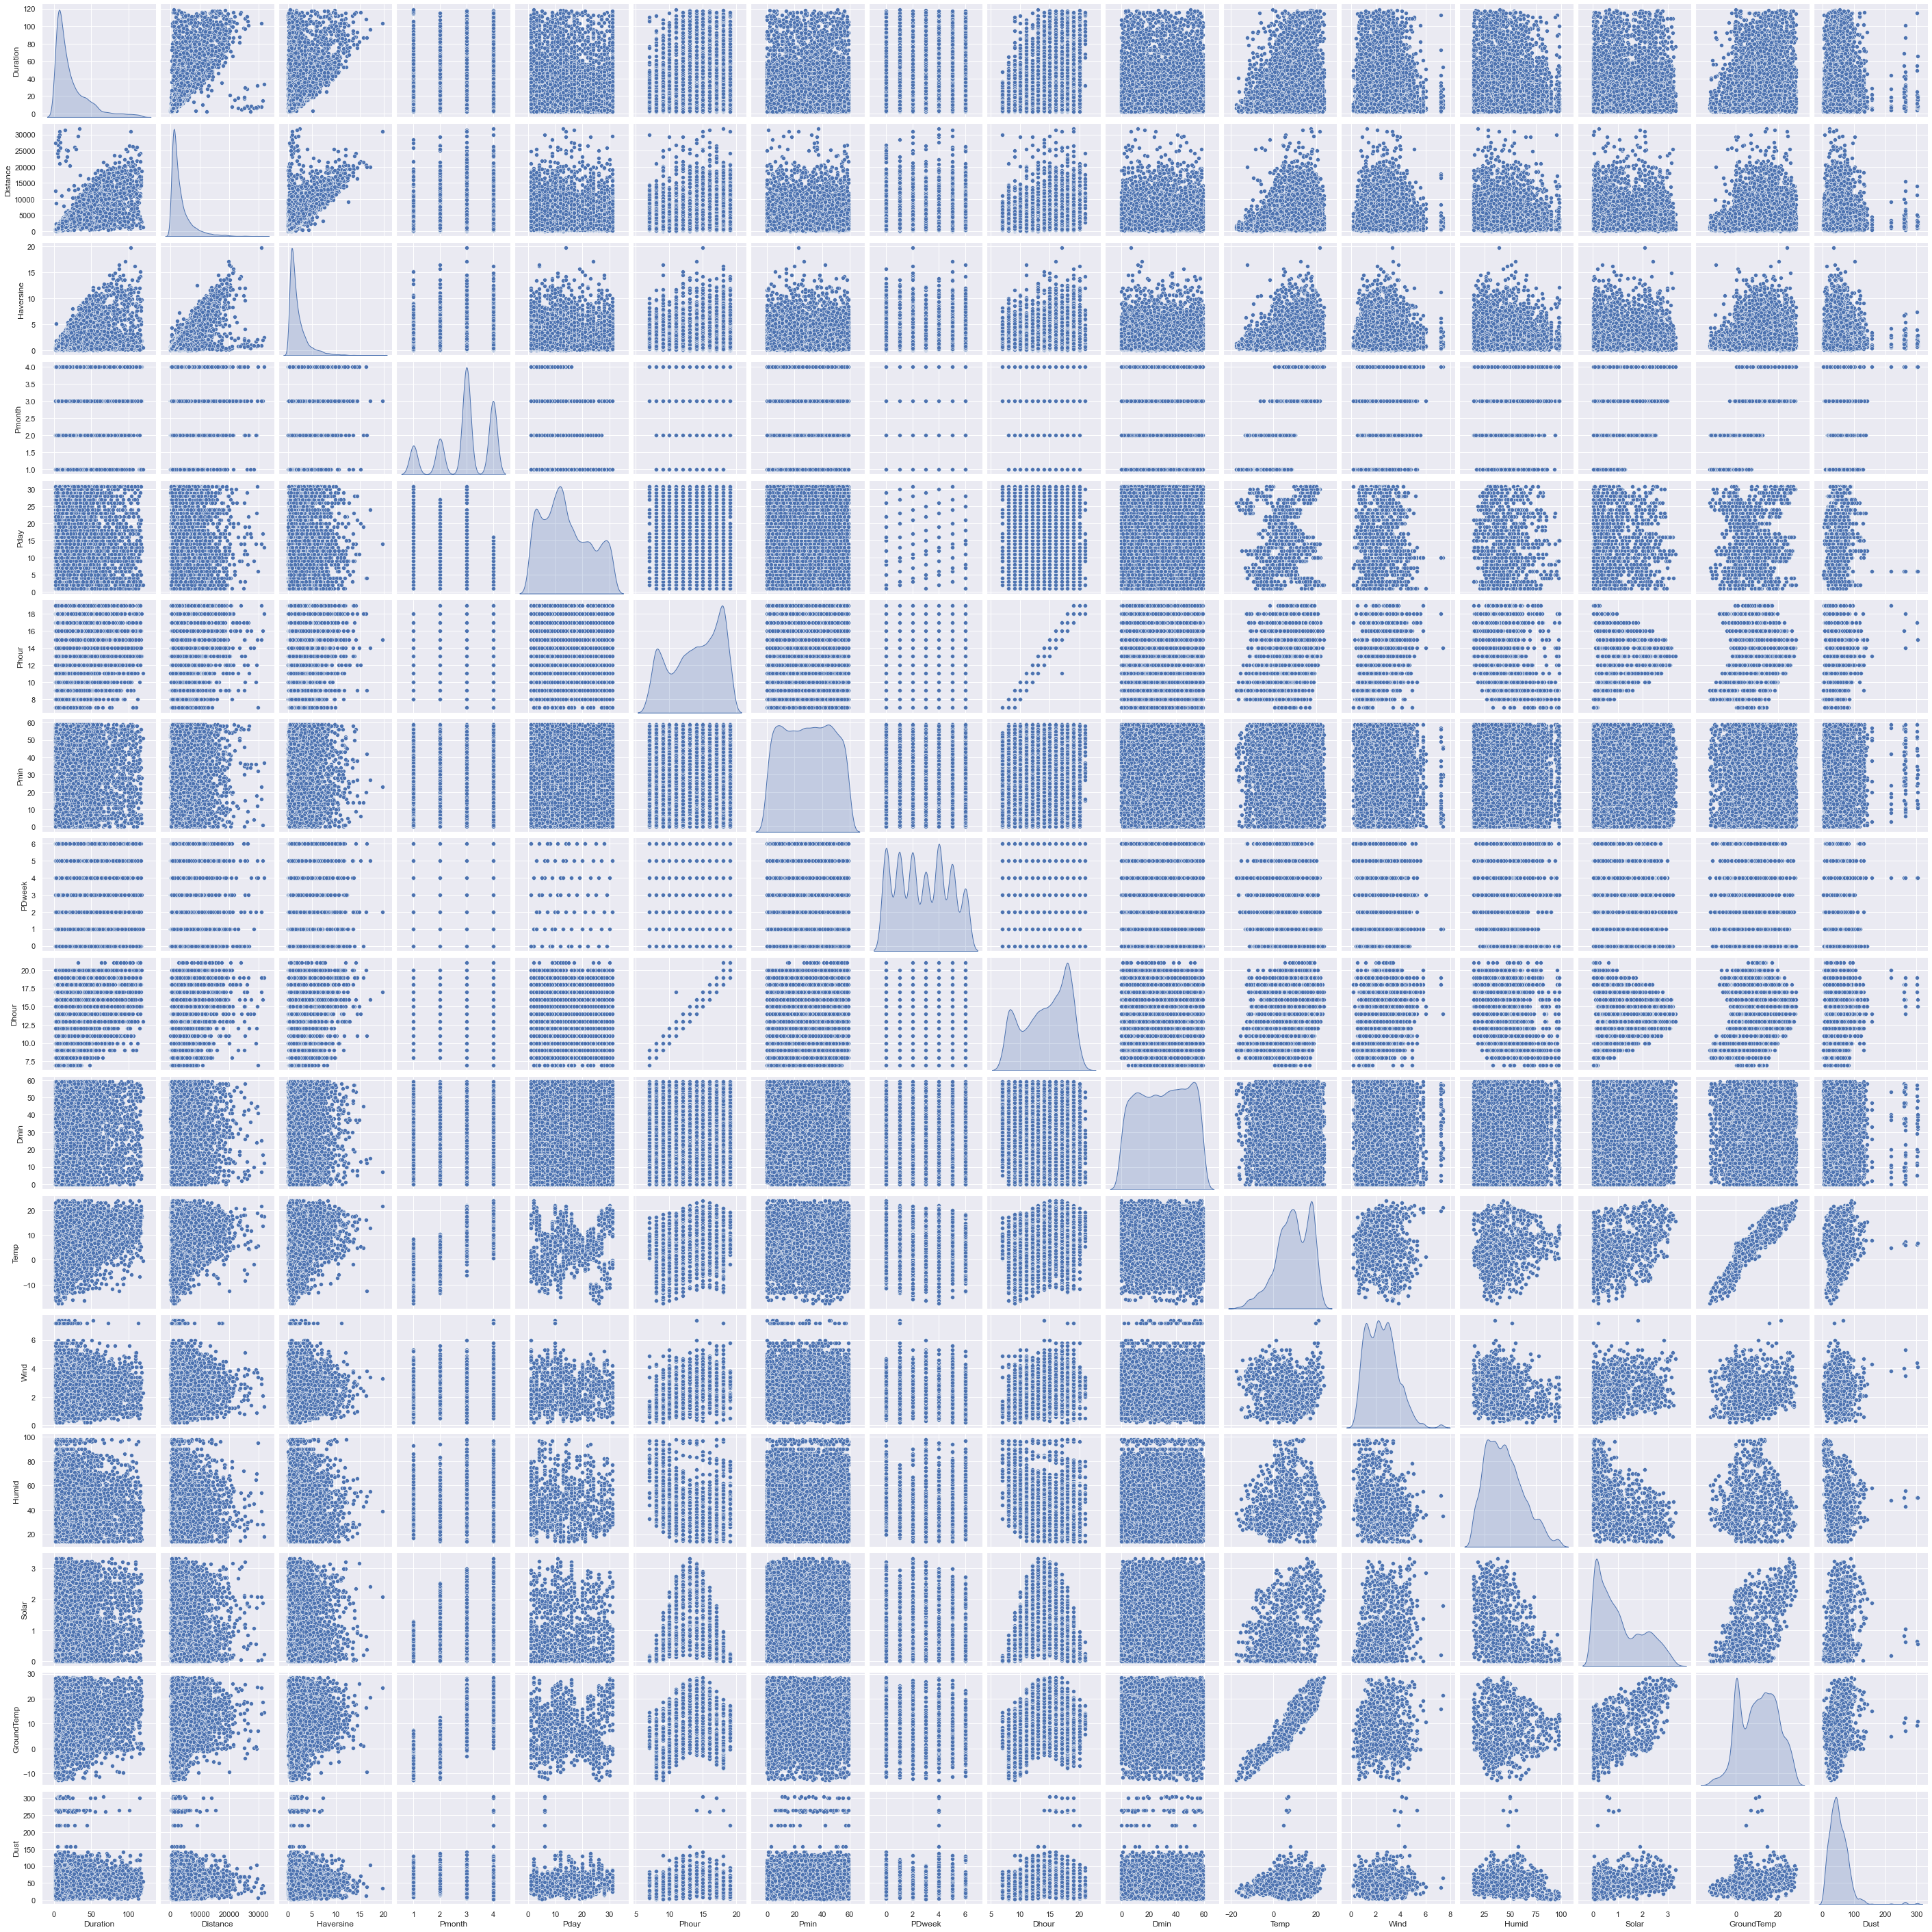

In [ ]:
sns.set(font_scale=1)
sns.pairplot(sampling, diag_kind='kde');

In [ ]:
# # Pearson and Spearman Correlation with Target


# fig, ax = plt.subplots(1, 3, figsize=(23 , 5))
# # 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
# #        'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
# #        'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
# #        'GroundTemp', 'Dust'
# feature_lst = ['Duration', 'Distance', 'Haversine','Temp', 'Wind', 'Humid', 'Solar', 'GroundTemp', 'Dust']

# for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
#     sns.heatmap(sampling[feature_lst].corr(method=method), ax=ax[idx],
#             square=True, annot=True, fmt='.1f', center=0, linewidth=2,
#             cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True)
#            ) 
#     ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

# plt.show()

# Feature Engineering

In [ ]:
# 5360947
seoul_data_sample = seoul_data.sample(n=53609, replace=True,random_state=101)
seoul_data_sample.reset_index(drop=True,inplace=True)
seoul_data_sample

Duration  Distance  Haversine  Pmonth  Pday  Phour  Pmin  PDweek  \
0            29      1520   0.601477       3     3     18    40       5   
1            17      2770   2.174453       3     9     16    20       4   
2            19      3000   1.884038       4     4     14    51       2   
3             3       730   0.497311       3     8     11    21       3   
4             4       600   0.511734       3    20     15    23       1   
...         ...       ...        ...     ...   ...    ...   ...     ...   
53604        16      1740   0.849882       4    13     18    53       4   
53605        21      2780   2.082600       4    11     16     4       2   
53606        11      1830   1.158601       3     6      8    36       1   
53607        86      8290   6.286169       3    17     14    28       5   
53608         4       770   0.647029       1     7     17    30       6   

       Dhour  Dmin  Temp  Wind  Humid  Solar  GroundTemp  Dust  
0         19    10  13.9   1.9     26   0.41         7.9    42  
1         16    38   9.6   1.7     38   1.71        13.0    40  
2         15    11  17.9   1.3     42   3.04        27.5    38  
3         11    24   4.5   2.0     82   0.73         7.1    11  
4         15    28   6.5   3.3     39   1.21        10.7    20  
...      ...   ...   ...   ...    ...    ...         ...   ...  
53604     19    11  17.5   1.3     18   0.23        14.5    22  
53605     16    27  16.9   4.4     23   2.39        22.2    37  
53606      8    48  -0.7   1.0     76   0.20        -0.8    19  
53607     15    54  12.1   2.3     29   2.26        20.4    47  
53608     17    35   2.3   0.2     33   0.13        -0.1    44  

[53609 rows x 16 columns]

In [ ]:
X = seoul_data_sample.drop(labels=["Duration"], axis = 1)
y = seoul_data_sample["Duration"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

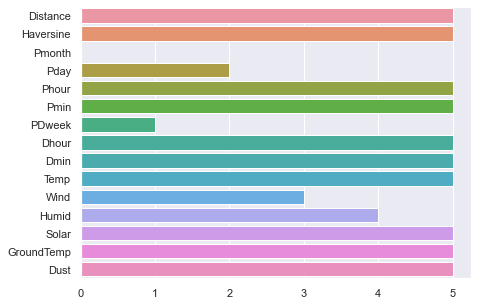

In [ ]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(y = X_train.columns, x = max(rfe.ranking_) - rfe.ranking_);

In [ ]:
feature_list_rfe = [col for i,col in enumerate(X_train.columns) if rfe.support_[i]]
feature_list_rfe

['Distance',
 'Haversine',
 'Phour',
 'Pmin',
 'Dhour',
 'Dmin',
 'Temp',
 'Solar',
 'GroundTemp',
 'Dust']

# Modelling

In [ ]:
X_train_rfe.shape

(40206, 10)

In [ ]:
X_test_rfe.shape

(13403, 10)

In [ ]:
y_train.shape

(40206,)

In [ ]:
y_test.shape

(13403,)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)

rf.fit(X_train_rfe, y_train)
y_hat_test = rf.predict(X_test_rfe)

# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)

In [ ]:
y_hat_train = rf.predict(X_train_rfe)

In [ ]:
y_hat_train

array([ 2.175, 94.655, 33.585, ..., 24.14 , 24.45 ,  4.3  ])

In [ ]:
print(f'Training score : {rf.score(X_train_rfe, y_train)}')

print()
print('r2 score:', r2_score(y_test, y_hat_test))
print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('MSE:', mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))

Training score : 0.9694552769051401

r2 score: 0.7712749207073085
MAE: 5.693790320574996
MSE: 120.12263109036535
RMSE: 10.960047038693098


C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


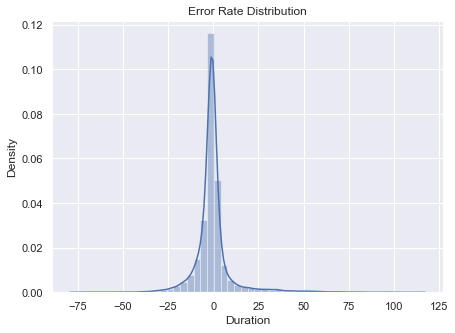

In [ ]:
plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_test)
plt.title("Error Rate Distribution");

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_rfe, y_train)
y_hat_test = xgb.predict(X_test_rfe)


In [ ]:
print(f'Training score : {xgb.score(X_train_rfe, y_train)}')

print()
print('r2 score:', r2_score(y_test, y_hat_test))
print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('MSE:', mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))

Training score : 0.9805806344418451

r2 score: 0.9394455861512461
MAE: 2.8726196069458543
MSE: 31.80217726075831
RMSE: 5.639341917348008


Test on further models like AdaBoost, Desision Tree, KNN, Extratrees, LinearRegression, XGBoost

# Feature Importance

checking feature importance using models

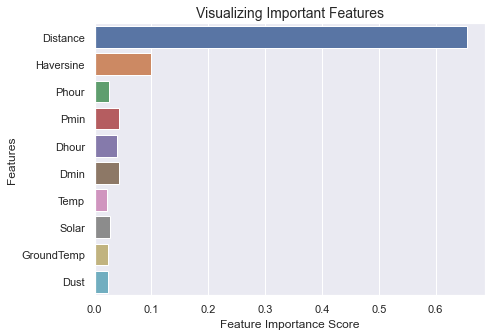

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x = rf.feature_importances_, y = feature_list_rfe)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=14);

# Hyperparametere Tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 50, 100,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1000, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_rfe, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 1000, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [ ]:
# best_params = {'n_estimators': 200,
#  'min_samples_split': 5,
#  'min_samples_leaf': 4,
#  'max_features': 'sqrt',
#  'max_depth': 50,
#  'bootstrap': True}

# rf = RandomForestRegressor(**best_params)


# Explainable AI

In [ ]:
dir_path = os.getcwd()
print("DIR PATH" + dir_path)
static_dir_path = os.path.join(dir_path, "Static")
report_path = os.path.join(static_dir_path, "For_modeling.csv")
df = pd.read_csv(report_path,nrows=1000,index_col=[0])
X = df.drop(labels=["Duration"], axis = 1)
y = df["Duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

DIR PATHd:\Python-dev3\rpa-infra\response_time\execution-dir\bike-trip-prediction


In [ ]:
rf1 = RandomForestRegressor()
xgb1 = XGBRegressor()
rf1.fit(X_train,y_train)
xgb1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

import shap
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")# Explainable AI

In [ ]:
import shap
shap_values = shap.TreeExplainer(rf1).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

ImportError: Numba needs NumPy 1.20 or less

In [ ]:
import shap
shap_values = shap.TreeExplainer(xgb1).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.dependence_plot('Haversine', shap_values, X_train)

In [ ]:
shap.dependence_plot('Distance', shap_values, X_train)

In [ ]:
shap.dependence_plot('Pmin', shap_values, X_train)

In [ ]:
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rf1)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(rf1.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,50) # Every 50 rows
S = X_output.iloc[random_picks]
S


NameError: name 'shap' is not defined

In [ ]:
shap_plot(6)                                                     